In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample dictionary
data = {
    'Age': [25, 29, np.nan, 35, 42, np.nan, 28, 40, 55, 60],
    'Salary': [50000, 54000, 61000, np.nan, 75000, 52000, 58000, 80000, 120000, 115000],
    'Department': ['IT', 'IT', 'IT', 'IT', 'HR', 'IT', 'IT', 'HR', 'IT', 'IT'], # Imbalanced
    'Score': [1, 2, 50, 1, 2, 3, 1, 2, 1, 100] # Skewed data
}

df = pd.DataFrame(data)

print("--- Original Data ---")
print(df.head())

--- Original Data ---
    Age   Salary Department  Score
0  25.0  50000.0         IT      1
1  29.0  54000.0         IT      2
2   NaN  61000.0         IT     50
3  35.0      NaN         IT      1
4  42.0  75000.0         HR      2


In [2]:
from sklearn.impute import SimpleImputer

# 1. Numerical Imputation (Mean)
# useful for 'Salary' where we want the average
num_imputer = SimpleImputer(strategy='mean')
df['Salary'] = num_imputer.fit_transform(df[['Salary']])

# 2. Numerical Imputation (Median)
# Useful for 'Age' if we suspect outliers, though here we use median for variety
med_imputer = SimpleImputer(strategy='median')
df['Age'] = med_imputer.fit_transform(df[['Age']])

print("\n--- After Imputation ---")
print(df.isnull().sum()) # Should all be zero now


--- After Imputation ---
Age           0
Salary        0
Department    0
Score         0
dtype: int64



--- Class Distribution ---
Department
IT    8
HR    2
Name: count, dtype: int64


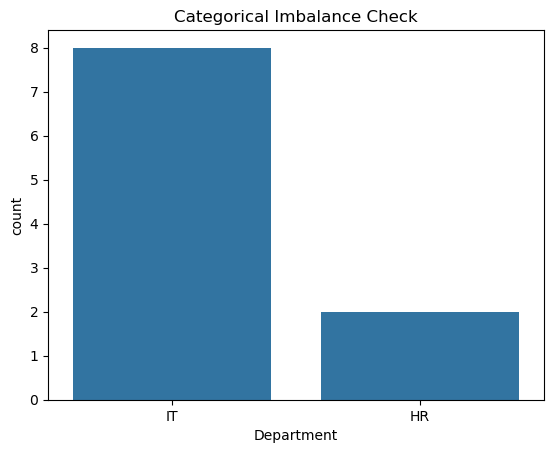

In [3]:
# Check counts
print("\n--- Class Distribution ---")
print(df['Department'].value_counts())

# Visualize
sns.countplot(x='Department', data=df)
plt.title("Categorical Imbalance Check")
plt.show()

# Note: In a real ML pipeline, if 'HR' was < 5%, we might use SMOTE here.


--- Normality Test (Salary) ---
Statistic: 0.834, P-value: 0.037
Result: Probably NOT Gaussian (Not Normal)


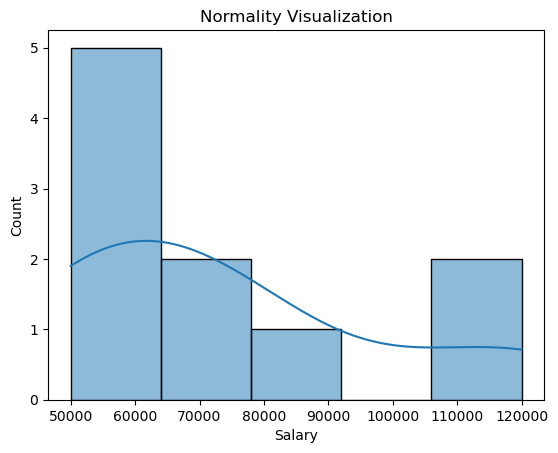

In [4]:
from scipy.stats import shapiro

# Statistical Test
stat, p_value = shapiro(df['Salary'])

print("\n--- Normality Test (Salary) ---")
print(f"Statistic: {stat:.3f}, P-value: {p_value:.3f}")

if p_value > 0.05:
    print("Result: Probably Gaussian (Normal)")
else:
    print("Result: Probably NOT Gaussian (Not Normal)")

# Visual Check
sns.histplot(df['Salary'], kde=True)
plt.title("Normality Visualization")
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# A. One-Hot Encoding for Categorical Data
# Converts 'IT' and 'HR' into separate binary columns
df = pd.get_dummies(df, columns=['Department'], drop_first=True) 
# drop_first=True avoids multicollinearity (dummy variable trap)

# B. Scaling/Standardization
# PCA requires data to be centered (Mean=0, Std=1)
scaler = StandardScaler()
features_to_scale = ['Age', 'Salary', 'Score']
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

print("\n--- Processed & Scaled Data ---")
print(df_scaled.head())


--- Processed & Scaled Data ---
        Age    Salary     Score  Department_IT
0 -1.299349 -0.998942 -0.487051           True
1 -0.925436 -0.831677 -0.455218           True
2 -0.130870 -0.538964  1.072786           True
3 -0.364566  0.000000 -0.487051           True
4  0.289783  0.046462 -0.455218          False


In [6]:
from sklearn.decomposition import PCA

# Initialize PCA keeping 2 components
pca = PCA(n_components=2)

# Apply PCA
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("\n--- PCA Result ---")
print(pca_df.head())

print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)
# This tells us how much information (variance) each component holds.


--- PCA Result ---
        PC1       PC2
0 -1.661306  0.366082
1 -1.308178  0.235252
2  0.113867  1.213747
3 -0.467545 -0.286290
4 -0.009934 -0.637494

Explained Variance Ratio: [0.74019579 0.1982684 ]
